# Analysis of World University Rankings 2020

### Content
+ Introduction: The World University Rankings
+ Data description and objectives
+ Research questions
+ Data preparation: cleaning and shaping
+ Data visualization

## 1. Introduction: The World University Rankings

The World University Rankings is an annual publication of university rankings by the Times Higher Education (THE) magazine for the year of 2020. The ranking features almost 1400 universities across 92 countries around the world, standing as the largest and most diverse university rankings ever to date. The rankings aim to help prospective students identify the leading schools worldwide.

The Times Higher Education has been providing reliable performance data on universities for students since the year of 2004. 
The table is based on 13 carefully gauged performance measures that reveal an institution’s performance. Mainly, each university is judged in five core missions covering the core missions of all world-class, global universities: Teaching, Research, Citations, Industry Income and International Outlook. The five scores in these categories for each ranked university are available under “performance breakdown”. This means that in addition to browsing universities by overall rank, or searching for a specific institution, we can sort the table by the five metrics to make a decision based on particular priorities.

The ranking is trusted worldwide by students, teachers, governments and industry experts as it provides great insight into the shifting balance of power in global higher education. Moreover, all the data is independently audited by professional services firm PricewaterhouseCoopers (PwC), making the Times Higher Education World University Rankings the only global university rankings to be subjected to full, independent scrutiny of this nature. 

* Source: https://www.timeshighereducation.com/world-university-rankings
* Source: https://www.kaggle.com/joeshamen/world-university-rankings-2020
* Source: https://www.timeshighereducation.com/student/advice/world-university-rankings-explained

## 2. Data description and objectives

Based on the description of World University Rankings above, it is clear that there are some universities which are most likely included to this list, for instance University of Oxford, Cambdridge University, Tsinghua University and others. These universities are being one of the most prestigious higher education institutions and well known for their great environment that fosters competitiveness, innovation and creativity. Additionally, these universities have amazing performance for the most of the core criteria. Therefore, in this analysis project I am keen of comparing different features that make the universities best.

The analysis of the following data set is based on data of the year of 2020. Apparently, this is the most recent data of Times Higher Education (THE) magazine. Below is the data that will be used for my analysis:

+ Rank_Char: ranking according to The Times Higher Education (varchar)
+ Score_Rank: ranking according to the column "Scoreresult" (number)
+ University: name of the university
+ Country: country of the university
+ Number_students: number of students
+ Numbstudentsper_Staff: ratio between the number of students and the staff
+ International_Students: percentage of international students
+ Percentage_Female: percentage of women
+ Percentage_Male: percentage of men
+ Teaching: score in teaching
+ Research: score in research
+ Citations: score in citations
+ Industry_Income: score in industry income
+ International_Outlook: score in international outlook
+ Score_Result: resulting score

Note: The score result has been calculated according to the weights described below:

| Variable | Description |Weight |
| -----------|------------|----------------|
| Teaching | The learning environment  | 30% |
| Research | Volume, income and reputation | 30% |
| Citations | Research influence | 30% |
| International outlook | International staff and students | 7.5% |
| Industry income | Income innovation | 2.5% |

## 3. Research questions

For this project, the research questions are as following:
1. Analyze the top universities by countries
2. Analyze the academic (teaching and research) performance by institutions
3. Analyze the international outlook: ratio of international to domestic staff/students
4. Analyze the female to male ratio by the total number of students
5. Analyze the relationship between variables in the dataset

## 4. Data preparation: cleaning and shaping

### 4.1. Dataset information
The "World University Rankings 2020" dataset is found and downloaded from the Kaggle platform. The file is presented in a .csv format (comma separated) with 1395 unique values and 16 variables within it. 

In [30]:
# import all modules that will be used
import numpy as np
import pandas as pd
from plotly.offline import iplot
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

In [31]:
# read csv file
uni_rank = pd.read_csv('Word_University_Rank_2020.csv')

# drop an unnecessary column: 'Overall_Ranking' since it has the same values as 'Score_Result' column
drop=(['Overall_Ranking'])
uni_rank.drop(drop,axis='columns',inplace=True)

In [32]:
# information including the existing variables and their data types
# uni_rank.dtypes
uni_rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank_Char                1396 non-null   object 
 1   Score_Rank               1396 non-null   int64  
 2   University               1396 non-null   object 
 3   Country                  1396 non-null   object 
 4   Number_students          1396 non-null   object 
 5   Numb_students_per_Staff  1396 non-null   float64
 6   International_Students   1396 non-null   object 
 7   Percentage_Female        1396 non-null   object 
 8   Percentage_Male          1396 non-null   object 
 9   Teaching                 1396 non-null   float64
 10  Research                 1396 non-null   float64
 11  Citations                1396 non-null   float64
 12  Industry_Income          1396 non-null   float64
 13  International_Outlook    1396 non-null   float64
 14  Score_Result            

In [33]:
# the shape: (rows, columns)
uni_rank.shape

(1396, 15)

In [34]:
# the length
len(uni_rank)

1396

In [35]:
# basic descriptive statistics for all numeric columns
uni_rank.describe()

,Score_Rank,Numb_students_per_Staff,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result
count,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000
mean,315.304441,18.966905,28.229083,23.981160,48.113109,46.477292,47.114542,34.794054
std,140.946223,16.835492,14.149550,17.537044,27.735626,16.273498,23.288723,16.946075
min,1.000000,0.900000,11.200000,6.800000,1.700000,34.400000,13.100000,10.700000
25%,212.000000,12.375000,18.300000,11.600000,23.375000,35.775000,27.475000,21.000000
50%,336.000000,16.350000,23.800000,18.000000,45.650000,39.400000,43.100000,31.600000
75%,437.000000,21.900000,33.600000,30.100000,71.950000,49.825000,62.800000,44.500000
max,535.000000,493.500000,92.800000,99.600000,100.000000,100.000000,99.700000,95.400000


From the output above, several conclusions can be made:
1. The total number of records in each of the columns is 1396
2. The mean value for the resulting score is 34.8 out of 100 possible
3. The minimum resulting score is 10.7, while maximum is 95.4 out of 100 possible 

In [36]:
# even though describe() method analyzes only numeric columns by default, we can provide other data types using include parameter
uni_rank.describe(include=np.object)

,Rank_Char,University,Country,Number_students,International_Students,Percentage_Female,Percentage_Male
count,1396,1396,1396,1396,1396,1396,1396
unique,145,1395,92,1377,63,74,74
top,1001+,Northeastern University,United States,"29,437",1%,55%,45%
freq,395,2,172,2,150,77,77


In [37]:
# let's take a look at top one institution's data
print("\nThe top 1 instituion's data:\n", uni_rank.iloc[0])


The top 1 instituion's data:
 Rank_Char                                     1
Score_Rank                                    1
University                 University of Oxford
Country                          United Kingdom
Number_students                          20,664
Numb_students_per_Staff                    11.2
International_Students                      41%
Percentage_Female                           46%
Percentage_Male                             54%
Teaching                                   90.5
Research                                   99.6
Citations                                  98.4
Industry_Income                            65.5
International_Outlook                      96.4
Score_Result                               95.4
Name: 0, dtype: object


### 4.2. Data manipulation: cleaning and shaping
Firstly, we need to create a data frame from the list of all universities data (obtained at the previous step).

Even though we already have a ready dataset, it is better to do the following:
+ round decimal numbers to integer result (if neccessary);
+ check for missing values and replace them by NaN if any;
+ check for dublicates.

In [45]:
# create a dataframe from the list of all universities data
df = pd.DataFrame(uni_rank)
df.head()

,Rank_Char,Score_Rank,University,Country,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result
0,1,1,University of Oxford,United Kingdom,"20,664",11.2,41%,46%,54%,90.5,99.6,98.4,65.5,96.4,95.4
1,2,2,California Institute of Technology,United States,"2,240",6.4,30%,34%,66%,92.1,97.2,97.9,88.0,82.5,94.5
2,3,3,University of Cambridge,United Kingdom,"18,978",10.9,37%,47%,53%,91.4,98.7,95.8,59.3,95.0,94.4
3,4,4,Stanford University,United States,"16,135",7.3,23%,43%,57%,92.8,96.4,99.9,66.2,79.5,94.3
4,5,5,Massachusetts Institute of Technology,United States,"11,247",8.6,34%,39%,61%,90.5,92.4,99.5,86.9,89.0,93.6


In [46]:
# a column representing the number of students per staff members should be converted to integer data type
df = df.astype({"Numb_students_per_Staff": "int"})
df.head(1)

,Rank_Char,Score_Rank,University,Country,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result
0,1,1,University of Oxford,United Kingdom,"20,664",11,41%,46%,54%,90.5,99.6,98.4,65.5,96.4,95.4


In [47]:
# check if dataset is complete 
df_valid = pd.DataFrame()
df_valid["Variables"] = list(df.columns)
df_valid["No"] = list(df.count())
df_valid.head(16) 

,Variables,No
0,Rank_Char,1396
1,Score_Rank,1396
2,University,1396
3,Country,1396
4,Number_students,1396
5,Numb_students_per_Staff,1396
6,International_Students,1396
7,Percentage_Female,1396
8,Percentage_Male,1396
9,Teaching,1396


In [48]:
# check for missing values 
df = pd.DataFrame(uni_rank) 
# using isnull() function for checking missing values
df.isnull()

,Rank_Char,Score_Rank,University,Country,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1392,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1393,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1394,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [49]:
# to be exactly sure, let's find the sum of the missing values if any
df.isnull().sum()

Rank_Char                  0
Score_Rank                 0
University                 0
Country                    0
Number_students            0
Numb_students_per_Staff    0
International_Students     0
Percentage_Female          0
Percentage_Male            0
Teaching                   0
Research                   0
Citations                  0
Industry_Income            0
International_Outlook      0
Score_Result               0
dtype: int64

The isnull() function is used in the code above in order to check missing values in Pandas DataFrame. This function returns dataframe of Boolean values which are True for NaN values. According to the output above, we can be sure that there are no missing values. Therefore, there is no need to drop any rows/columns with Null values using dropna() method.  

In [50]:
# check for dublicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1391    False
1392    False
1393    False
1394    False
1395    False
Length: 1396, dtype: bool

In [51]:
df.duplicated().sum()

0

The duplicated() function is used to indicate duplicate values. This function returns dataframe of Boolean values which are True for duplicate values. According to the output above, it is clear that there are no duplicates. 

### Further data preparation

In [52]:
# now, let's try to highlight the max value for each of the numeric columns step by step

# setting 'University' as index columns
# use select_dtypes to select numerical values only 
uni_rank_num = uni_rank.set_index('University').select_dtypes('number')
uni_rank_num

,Score_Rank,Numb_students_per_Staff,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result
University,,,,,,,,
University of Oxford,1,11.2,90.5,99.6,98.4,65.5,96.4,95.4
California Institute of Technology,2,6.4,92.1,97.2,97.9,88.0,82.5,94.5
University of Cambridge,3,10.9,91.4,98.7,95.8,59.3,95.0,94.4
Stanford University,4,7.3,92.8,96.4,99.9,66.2,79.5,94.3
Massachusetts Institute of Technology,5,8.6,90.5,92.4,99.5,86.9,89.0,93.6
...,...,...,...,...,...,...,...,...
Cear� State University,531,17.8,16.2,8.3,6.1,35.6,16.3,11.3
Pontifical Catholic University of Minas Gerais,532,21.3,15.3,7.7,6.7,35.1,19.4,11.2
Bashkir State University,533,11.1,17.0,8.1,4.5,36.9,16.7,11.1


In [53]:
# using idxmax() function in order to find the index of the max value along the index axis (i.e. University)
# dropping duplicates, e.g. University of Oxford is top 1 by an overall score as well as by research area
idx = uni_rank_num.idxmax().drop_duplicates()
idx

Score_Rank                   Tokyo Denki University
Numb_students_per_Staff          Anadolu University
Teaching                        Stanford University
Research                       University of Oxford
Citations                       Brandeis University
Industry_Income                 Tsinghua University
International_Outlook      University of Luxembourg
dtype: object

In [54]:
# return the values
# loc[idx] attribute is used for accessing values in idx
uni_max = uni_rank_num.loc[idx]
uni_max # uni_rank_num_idx_max

,Score_Rank,Numb_students_per_Staff,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result
University,,,,,,,,
Tokyo Denki University,535,25.6,15.2,9.3,3.4,39.6,17.7,10.7
Anadolu University,447,493.5,13.0,24.1,16.5,100.0,17.3,19.9
Stanford University,4,7.3,92.8,96.4,99.9,66.2,79.5,94.3
University of Oxford,1,11.2,90.5,99.6,98.4,65.5,96.4,95.4
Brandeis University,158,12.2,28.5,22.9,100.0,35.6,53.4,50.3
Tsinghua University,22,12.0,86.6,94.0,74.6,100.0,47.4,82.6
University of Luxembourg,133,18.7,37.9,36.5,75.8,45.2,99.7,53.7


In [55]:
# highlight each of the column's maximum value

# HIGHLIGHTING IS NOT VISIBLE IN GIT, however it highlights in yellow color the max values for each columns 
uni_max.reset_index().style.highlight_max()

,University,Score_Rank,Numb_students_per_Staff,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result
0,Tokyo Denki University,535,25.600000,15.200000,9.300000,3.400000,39.600000,17.700000,10.700000
1,Anadolu University,447,493.500000,13.000000,24.100000,16.500000,100.000000,17.300000,19.900000
2,Stanford University,4,7.300000,92.800000,96.400000,99.900000,66.200000,79.500000,94.300000
3,University of Oxford,1,11.200000,90.500000,99.600000,98.400000,65.500000,96.400000,95.400000
4,Brandeis University,158,12.200000,28.500000,22.900000,100.000000,35.600000,53.400000,50.300000
5,Tsinghua University,22,12.000000,86.600000,94.000000,74.600000,100.000000,47.400000,82.600000
6,University of Luxembourg,133,18.700000,37.900000,36.500000,75.800000,45.200000,99.700000,53.700000


From the output above, we can explicitly see the maximum value of each numeric column in a dataset. This approach of presenting data is way better and convenient since it is now much easier to spot the max values. A few examples of reading information:
1. University of Oxford has the highest position in the overall ranking as well as in research area. 
2. Anadolu University and Tsinghua University both have the maximum points (100 out of 100) for the Industry Income area.
3. The maximum value for the Teaching criteria is 92.8 out of 100 possible points, and is obtained by Stanford University.

In [58]:
# rename 'Rank_Chart' to 'Rank' for more convenient usage
uni_rank = uni_rank.rename(columns = {'Rank_Char':'Rank'})
uni_rank

,Rank,Score_Rank,University,Country,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result
0,1,1,University of Oxford,United Kingdom,"20,664",11.2,41%,46%,54%,90.5,99.6,98.4,65.5,96.4,95.4
1,2,2,California Institute of Technology,United States,"2,240",6.4,30%,34%,66%,92.1,97.2,97.9,88.0,82.5,94.5
2,3,3,University of Cambridge,United Kingdom,"18,978",10.9,37%,47%,53%,91.4,98.7,95.8,59.3,95.0,94.4
3,4,4,Stanford University,United States,"16,135",7.3,23%,43%,57%,92.8,96.4,99.9,66.2,79.5,94.3
4,5,5,Massachusetts Institute of Technology,United States,"11,247",8.6,34%,39%,61%,90.5,92.4,99.5,86.9,89.0,93.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,1001+,531,Cear� State University,Brazil,"20,174",17.8,0%,55%,45%,16.2,8.3,6.1,35.6,16.3,11.3
1392,1001+,532,Pontifical Catholic University of Minas Gerais,Brazil,"34,101",21.3,0%,57%,43%,15.3,7.7,6.7,35.1,19.4,11.2
1393,1001+,533,Bashkir State University,Russian Federation,"15,236",11.1,3%,63%,37%,17.0,8.1,4.5,36.9,16.7,11.1
1394,1001+,534,University of Caxias do Sul,Brazil,"17,101",24.9,0%,54%,46%,13.8,7.8,7.6,35.0,17.7,11.0


## 5. Data visualization 

In this section I am going to respond objectives of the project by applying some data analysis and visualization techniques. 

### 5.1 Q1: Distribution of the top universities by countries


In [59]:
# Displaying country distribution
country_stats = uni_rank["Country"].value_counts()
country_stats

United States     172
Japan             110
United Kingdom    100
China              81
India              56
                 ... 
Ghana               1
Cuba                1
Belarus             1
Qatar               1
Malta               1
Name: Country, Length: 92, dtype: int64

The data above shows a series that contain counts of unique values. For example, there are overall 172 values for the United States, 110 per Japan, 100 per United Kingdom, etc. The series is presented in descending order.

In [60]:
# descriptive statistics for the column 'Country'
country_stats.describe()

count     92.000000
mean      15.173913
std       26.290686
min        1.000000
25%        2.000000
50%        6.000000
75%       14.000000
max      172.000000
Name: Country, dtype: float64

There is a descriptive statistics for the 'Country' column showing that there are 92 unique values (country names), the maximum per each country is 172, while the minimum is 1.

In [61]:
# split data into groups using groupby() function for the first 100 values
df = uni_rank.head(100)
country_stats_info = df.groupby('Country')['Rank'].nunique().sort_values(ascending=False)
country_stats_info

Country
United States     39
United Kingdom    11
Germany            8
Netherlands        6
Australia          6
Canada             5
Switzerland        4
Hong Kong          3
France             3
China              3
Sweden             2
South Korea        2
Singapore          2
Japan              2
Finland            1
Belgium            1
Name: Rank, dtype: int64

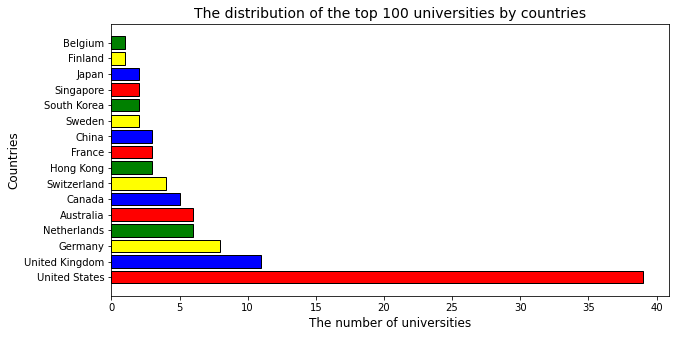

In [62]:
# build histogram for the top 100 records
plt.figure(figsize = (10,5))
colors=['red','blue', 'yellow', 'green']
plt.barh(country_stats_info.index, country_stats_info, color = colors, ec='black')
plt.title('The distribution of the top 100 universities by countries',fontsize = 14)
plt.xlabel('The number of universities', fontsize = 12)
plt.ylabel('Countries', fontsize = 12)
plt.show()

**Distribution Analysis:**

To begin with, a bar chart above focuses on the distribution of the first top 100 universities by country of location.These higher institutions are located in 16 different countries.

From the resulting chart it is clear that the highest number of all universities belong to the United States, meaning that the majority of the first top 100 universities are mostly based across the United States. To be exact, 39 are in the U.S. United Kingdom is in the second place with overall 11 of their institutions in the top 100. 

Germany, Netherlands and Australia's indicators are roughly the same with 8, 7 and 6 respectively.
The other 28 are splitted in 12 different countries with the following data:
1. Canada - 5
2. Switzerland - 4
3. France, China and Hong Kong - 3 each
4. Japan, Singapore, South Korea and Sweden - 2 each
5. Finland and Belgium - 1 each

### 5.2 Q2: Distribution of an academic performance by institutions

In [63]:
# displaying research distribution
# df = pd.DataFrame(uni_rank)
research_stats = df["Research"]
research_stats

0     99.6
1     97.2
2     98.7
3     96.4
4     92.4
      ... 
95    46.5
96    59.3
97    54.3
98    47.9
99    61.5
Name: Research, Length: 100, dtype: float64

In [64]:
# descriptive statistics for the research column
research_stats.describe()

count    100.000000
mean      70.171000
std       15.620592
min       39.900000
25%       58.025000
50%       69.100000
75%       82.775000
max       99.600000
Name: Research, dtype: float64

There is a maximum of 99.6 and minimum of 6.8 points out of 100 possible for the Research performance. The mean value for this column will be 23.98

In [65]:
# displaying teaching distribution
# df = pd.DataFrame(uni_rank)
teaching_stats = df["Teaching"]
teaching_stats

0     90.5
1     92.1
2     91.4
3     92.8
4     90.5
      ... 
95    43.3
96    43.4
97    40.7
98    41.1
99    55.6
Name: Teaching, Length: 100, dtype: float64

In [66]:
# descriptive statistics for the teaching column
teaching_stats.describe()

count    100.000000
mean      64.188000
std       15.065348
min       39.400000
25%       53.600000
50%       62.050000
75%       76.650000
max       92.800000
Name: Teaching, dtype: float64

There is a maximum of 92.8 and minimum of 11.2 points out of 100 possible for the Teaching performance. The mean for this column will be 28.23

In [68]:
# top 50 universities and their academic performace

uni_top50 = df.head(50) # select the top 50 universities 

# go.Scatter was used for plotting points and lines 
fig1 = go.Scatter(
    x=uni_top50["Rank"], # assigning x and y values: ranking and teaching columns respectively
    y=uni_top50["Teaching"],
    mode="lines+markers", # the line and mark points 
    name = "Teaching", # name of the scatter plot
    marker = dict(color = 'Green'), # the color 
    text= uni_top50["University"] # displaying university's name
)

fig2 = go.Scatter(
    x=uni_top50["Rank"],
    y=uni_top50["Research"],
    name = "Research",
    mode = "lines+markers",
    line = dict(color = 'Blue'),
    text= uni_top50["University"]
)

fig3 = go.Scatter(
    x=uni_top50["Rank"],
    y=uni_top50["Score_Result"],
    name = "Total score",
    mode = "lines+markers",
    line = dict(color = 'red'),
    text= uni_top50["University"]
)

data = [fig1, fig2, fig3]
layout = dict(title = 'Academic Environment and The Overall Score for The Top 50 Universities', # the title
              xaxis = dict(title = 'World Rank'), # x-axis title
              yaxis = dict(title = 'Overall Score')) # y-axis title
fig = dict(data = data, layout = layout, frames = None) 
iplot(fig) # display

# THE SCATTER PLOT BELOW IS NOT VISIBLE IN GITHUB 

Since there was a big difference between min and max values for both Research and Teaching, I decided to consider the distribution of the first top 50 universities.

**Distribution Analysis:**

The scatter plot above shows the distribution of an academic performance by the rank as well as the overall score by the rank. The academic performance in this case includes Teaching and Research areas.
As for the visualization I chose to build a scatter plot because it perfectly fits on what should be done, i.e.
display the values of different variables as points. For the mode argument, I decided to choose both lines and points for more convenient view of data. 

By navigating to the points, we can obtain data on particular university. The examples:

1. The green line represents 'Teaching' and contains information on rank and teaching
The data is given in the following format:

"(rank, teaching indicator)  
university name"

Ex.: (1, 90.5)
University of Oxford

According to this data, we can see that University of Oxford is top 1 worldwide with the total of 90.5 for the Teaching performance.

2. The blue line represents 'Research' and contains information on rank and research. The data is given in the same format with corresponding variables.

Ex.: (1, 99.6)
University of Oxford

According to this data, we can conclude that University of Oxford has 99.6 indicator for the Research performace. 
3. The red line represents 'The Total Score' and contains information on rank and the total score. The data is given in the same format with corresponding variables.

Ex.: (1, 95.4)
University of Oxford 

According to this data, we can conclude that University of Oxford has the total (overall) score of 95.4 being the top 1 university in the world. 


It should be mentioned that both teaching and research environments have a weight of 30% each in the calculation of the total score for the universities. 